In [28]:
%matplotlib inline
import os
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def read_corrfile(file):
    with open(file,'r') as f:
    
        for line in f:
            if line.startswith('[Para'):
                break
        parameters=[]
        for line in f:
            if line.startswith('[Corr'):
                break
            parameters.append(line)
        corrfcts=[]
        for line in f:
            if line.startswith('[Raw'):
                break
            corrfcts.append([float(a) for a in line.split()])
        for line in f:
            if line.startswith('[IntensityHistory'):
                break
        intensity=[]
        for line in f:
            if line.startswith('[Overflow'):
                break
            if line.startswith('Trace'):
                trace=line
            else:
                intensity.append([float(a) for a in line.split()])
    return parameters,corrfcts,intensity

In [30]:
datadir='050a/'

In [31]:
filelist=os.listdir(datadir)

groups=collections.defaultdict(list)

for file in filelist:
    if file.find('_')==-1:
        continue
    filestart=file[:file.find('_')]
    if file.endswith('.sin') or file.endswith('.SIN'):
        groups[filestart].append(file)

In [32]:
groups

defaultdict(list,
            {'OL': ['OL_N_050_0.sin',
              'OL_N_050_1.sin',
              'OL_N_050_10.sin',
              'OL_N_050_11.sin',
              'OL_N_050_12.sin',
              'OL_N_050_13.sin',
              'OL_N_050_14.sin',
              'OL_N_050_2.sin',
              'OL_N_050_3.sin',
              'OL_N_050_4.sin',
              'OL_N_050_5.sin',
              'OL_N_050_6.sin',
              'OL_N_050_7.sin',
              'OL_N_050_8.sin',
              'OL_N_050_9.sin']})

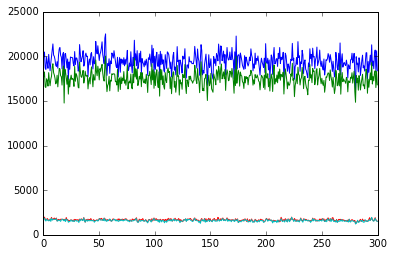

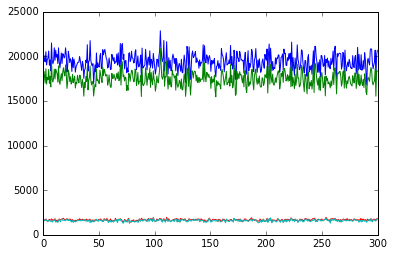

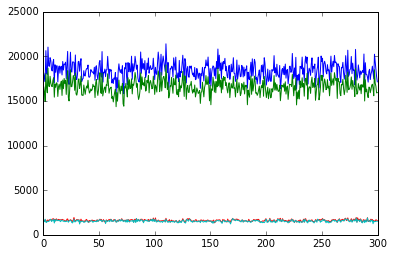

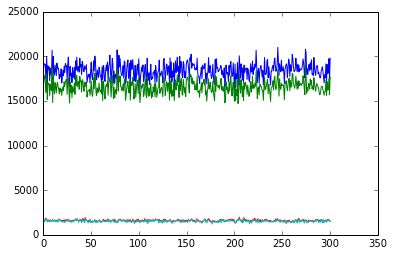

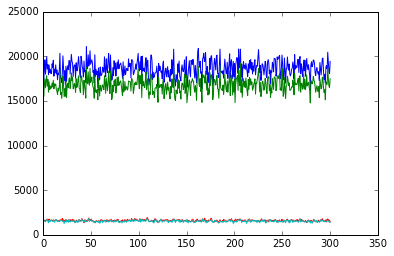

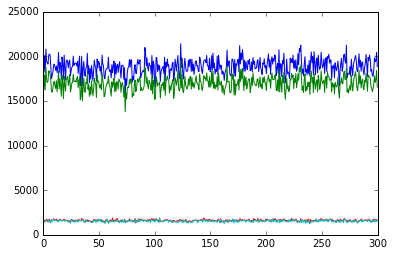

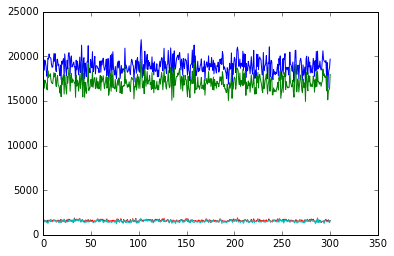

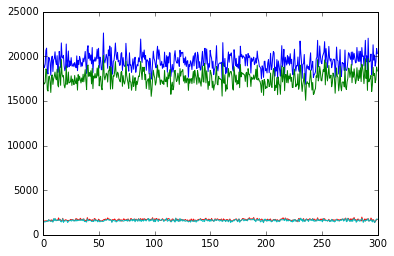

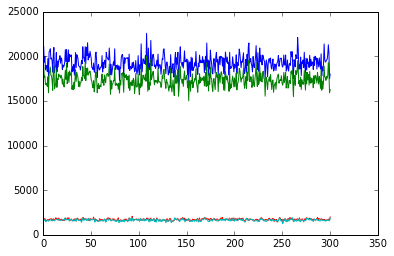

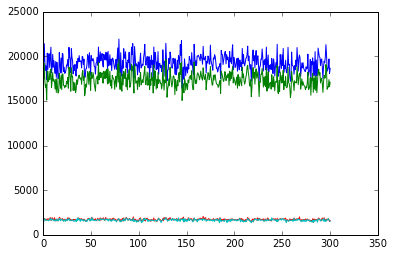

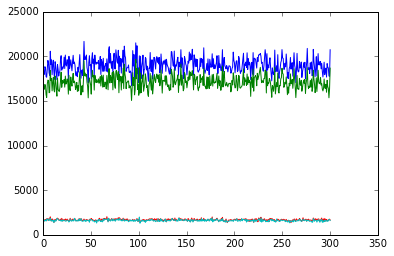

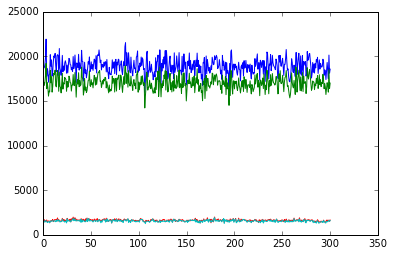

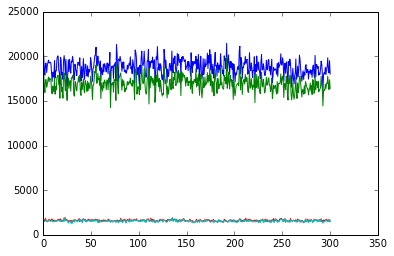

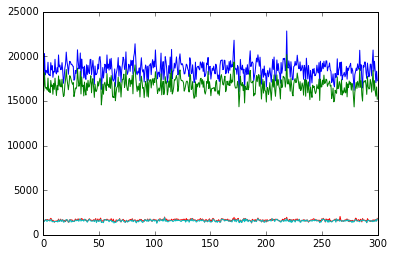

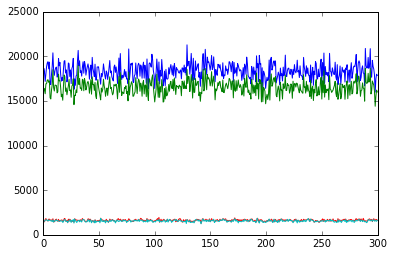

In [33]:
for filestart in groups:
    for file in groups[filestart]:
        para, corrfcts, intensity = read_corrfile(datadir+file)
        intensities=pd.DataFrame(np.array(intensity),columns=['t','intA','intB','intC','intD'])
        plt.figure()
        plt.plot(intensities['t'],intensities['intA'])
        plt.plot(intensities['t'],intensities['intB'])
        plt.plot(intensities['t'],intensities['intC'])
        plt.plot(intensities['t'],intensities['intD'])